In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = 'ASIANPAINT.NS'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,179.100006,179.990005,178.000000,178.865005,160.771790,80350
2010-01-05,179.800003,180.494995,178.500000,179.429993,161.279526,849100
2010-01-06,181.475006,181.475006,178.100006,178.889999,160.794205,73450
2010-01-07,179.875000,179.875000,176.899994,177.065002,159.153839,240320
2010-01-08,177.449997,183.399994,177.065002,179.990005,161.782959,711310


In [3]:
price = data['Close']
price

Date
2010-01-04     178.865005
2010-01-05     179.429993
2010-01-06     178.889999
2010-01-07     177.065002
2010-01-08     179.990005
                 ...     
2023-05-08    3019.449951
2023-05-09    3034.800049
2023-05-10    3041.399902
2023-05-11    3139.750000
2023-05-12    3131.100098
Name: Close, Length: 3297, dtype: float64

<AxesSubplot: xlabel='Date'>

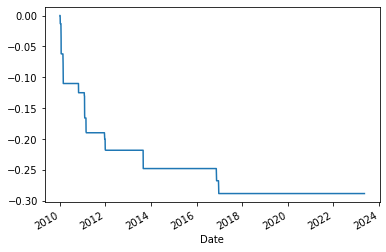

In [4]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [5]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -28.855005329413764 %


In [6]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00315874, -0.00300949, ...,  0.00217472,
        0.03233711, -0.00275497])

In [7]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([ 1.        ,  1.00315874,  1.00013974, ..., 17.00388454,
       17.55374111, 17.50538116])

In [8]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 1750.5381161749608%


In [9]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.099472
2012-12-31    0.709858
2013-12-31    0.105458
2014-12-31    0.535306
2015-12-31    0.174465
2016-12-31    0.008488
2017-12-31    0.300152
2018-12-31    0.185196
2019-12-31    0.299989
2020-12-31    0.548783
2021-12-31    0.223711
2022-12-31   -0.087217
2023-12-31    0.013990
Freq: A-DEC, Name: Close, dtype: float64

In [10]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.022811
2010-03-31    0.126468
2010-04-30    0.019594
2010-05-31    0.003512
                ...   
2023-01-31   -0.117248
2023-02-28    0.037768
2023-03-31   -0.023738
2023-04-30    0.050948
2023-05-31    0.078815
Freq: M, Name: Close, Length: 161, dtype: float64

In [11]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 22.45160396532103%


In [12]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 20.94528950279953


In [13]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.022811
2010-09-30   -0.035998
2010-11-30   -0.014454
2011-01-31   -0.104631
2011-02-28   -0.068594
                ...   
2022-09-30   -0.014492
2022-10-31   -0.070233
2022-12-31   -0.027479
2023-01-31   -0.117248
2023-03-31   -0.023738
Name: Close, Length: 64, dtype: float64

In [14]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 45.13954980519284
